In [1]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()
from sklearn.decomposition import PCA

import imp

from ikd import utils, core, evaluate, datasets
imp.reload(utils)
imp.reload(core)
imp.reload(evaluate)
imp.reload(datasets)

from ipywidgets import interact
import ipywidgets as widgets

In [2]:
d_latent = 3 # latent dimensionality
dataset = 1
n_points = 100 # number of observations T
d_observation = 200 # observation dimensionality
kernel = ["squared exponential", "rational quadratic", "gamma-exponential", "matern"][0]
extra_kernel_hyperparam = [None, 1, 1, 3/2][0]
variance = 1
length_scale = 0.5

z_true = datasets.generate_latent(d_latent, dataset, n_points=n_points, show=False)
cov_true = utils.kernel_cov_generator(z_true, kernel=kernel, variance=variance, length_scale=length_scale, extra_kernel_hyperparam=extra_kernel_hyperparam) # K, true kernel covariance matrix

Clique threshold: 0.2397940008672037, number of cliques: 194


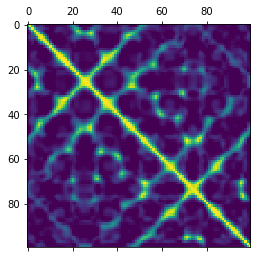

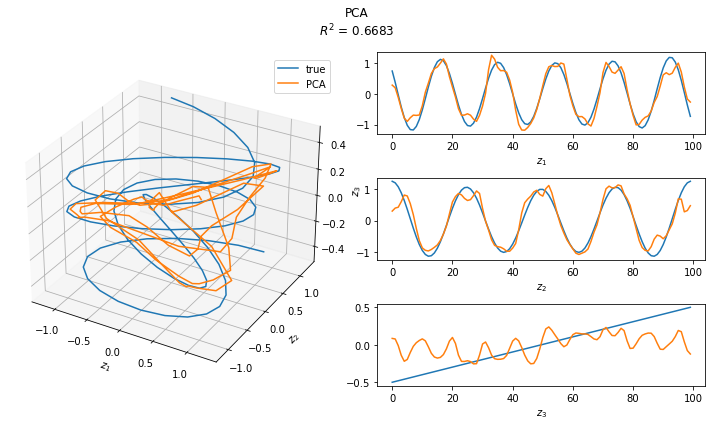

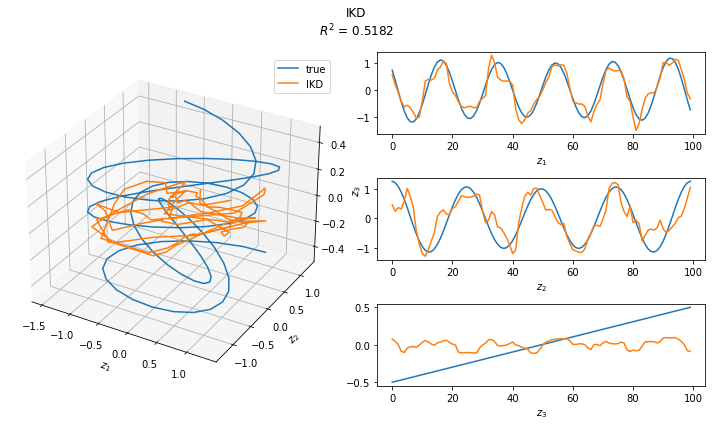

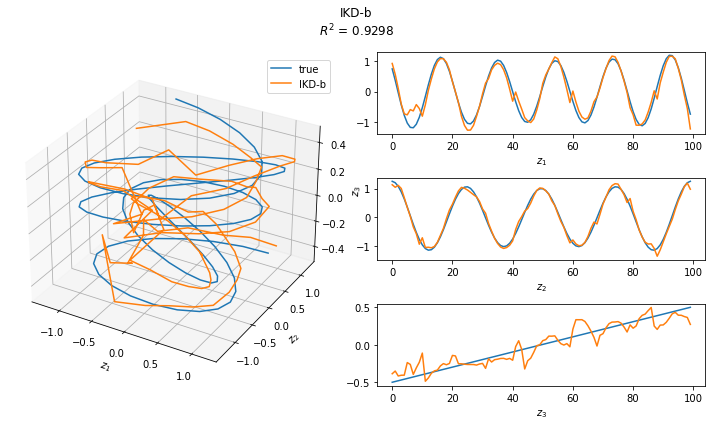

In [3]:
seed = 41
x = datasets.gaussian_process_generator(cov_true, d_observation, seed)
cov_samp_th = utils.filt_cov_samp(np.cov(x), variance=variance)
plt.matshow(cov_samp_th)

z_pca = PCA(n_components=d_latent).fit_transform(x)
z_ikd = core.ikd(cov_samp_th, d_latent, kernel=kernel, variance=variance, extra_kernel_hyperparam=extra_kernel_hyperparam)[0]
z_ikd_b = core.ikd_blockwise(cov_samp_th, d_latent, kernel=kernel, variance=variance, extra_kernel_hyperparam=extra_kernel_hyperparam, clique_th_or_d_observation=d_observation, z_ref=z_pca)

evaluate.compare_latents(z_true, utils.align(z_true, z_pca), 'PCA')
evaluate.compare_latents(z_true, utils.align(z_true, z_ikd), 'IKD')
evaluate.compare_latents(z_true, utils.align(z_true, z_ikd_b), 'IKD-b')